In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from zss import Node, distance
import sympy as sp
from sympy.parsing.latex import parse_latex

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


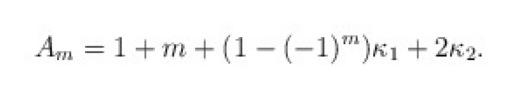

\begin{align*}A_m = 1+m+(1-(-1)^m)\kappa_1 + 2\kappa_2.\end{align*}


In [8]:
data = load_dataset("OleehyO/latex-formulas", "cleaned_formulas", trust_remote_code=True)
df = pd.DataFrame(data['train'][:20000])

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

show_image(df['image'][0]) # <class 'PIL.JpegImagePlugin.JpegImageFile'>
print(df['latex_formula'][0]) # string

In [10]:
def preprocess_latex(latex_src, rem):
  """
  latex_src: string of LaTeX source code to pre-process
  rem: string of formatting element which we want to remove from latex_src. includes opening curly brace. ex. \mathrm{
  """
  final_string = latex_src
  format_index = latex_src.find(rem)
  while format_index != -1:
    # iterate through string until you find the right closing curly brace to remove
    index = format_index + len(rem)
    closing_brace = -1
    num_opening = 0
    while index < len(final_string):
      if final_string[index:index+1] == "{":
        num_opening += 1
      elif final_string[index:index+1] == "}":
        if num_opening == 0:
          closing_brace = index
          break
        else:
          num_opening -= 1
      index += 1

    # entering this if statement means something went wrong.
    # nothing is removed in this case
    if closing_brace == -1:
      return final_string

    final_string = final_string[:format_index]+final_string[format_index+len(rem):closing_brace]+final_string[closing_brace+1:]
    format_index = final_string.find(rem)
  
  return final_string

print("Finished preprocess_latex")

# Parses sympy expression into Zss tree
def sympy_to_zss(expr):
    if isinstance(expr, sp.Symbol) or isinstance(expr, sp.Number):
        return Node(str(expr))
    else:
        full_class_str = str(expr.func)
        class_name = full_class_str.split('.')[-1].rstrip("'>")
        node = Node(class_name)
        for arg in expr.args:
            child_node = sympy_to_zss(arg)
            node.addkid(child_node)
    return node


# Input is string of LaTeX source code. Runs sympy parser and ZSS tree parser.
# Returns parsed ZSS tree.
def source_to_zss(latex_expr):
  print('Started: ' + latex_expr)
  sympy_expr = parse_latex('latex_expr')
  print('SymPy')
  zss_tree = sympy_to_zss(sympy_expr)
  print('ZSS')
  print(type(zss_tree))
  print()
  return zss_tree

Finished preprocess_latex


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
/var/folders/zj/kpptzq657ns6c10nk77xfh0w0000gp/T/ipykernel_86230/2606140733.py:2: SyntaxWarning: invalid escape sequence '\m'
  """
